<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/YoloV4_tiny_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 14997 (delta 18), reused 31 (delta 12), pack-reused 14951
Receiving objects: 100% (14997/14997), 13.38 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (10180/10180), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
!pwd

/content/darknet


In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [8]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2009.05451.pdf
'3rd Sem_Fall 2020 '
'5th Main Road 10.m4a'
'602 links.gdoc'
 603_project
'603 Project docs.gdoc'
 Articles.gdoc
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Chapter_12_Cognitive_Computing).pdf'
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Other_Books_You_May_Enjoy).pdf'
'August 2020.gdoc'
'August 2020.pdf'
'AWS Cloud Practitioner .gdoc'
 AWSome_Day_Online-Oct_16__2019.pdf
 AWSProServInternship
'Basic Architecture.gslides'
'Beta Release Review Assignment.gdoc'
 BUSTrPaper.pdf
 chatbot_covid.ipynb
'Cloud .gdoc'
 CMSC636FinalPresentation.gslides
'Colab Notebooks'
'Copy of Poster Template.gslides'
 DATA606
'DATA690 Fall 2020: S1.gdoc'
'Data690  HW1 S20 Sai Manikanta Yerram'
'Data690 HW4 S20 Sai Manikanta Yerram'
 DATA690NLP_PPT.gslides
'Document from Shrimanth'
 EDA_steps.gdoc
 Final_Exam
'Gmail - MPS DS Semester 1 Subjects.pdf'
 GraphDatabasesinFraudDetection.pdf
 HomeWork8.drawio
 IMG-20200606-WA0016.jpg
 ImpDocuments
 India2020Printouts
 

In [9]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [10]:
!pwd

/content/darknet


In [11]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov4

obj.data   train.txt		   yolov4_custom_train.cfg
obj.names  val.txt		   yolov4_tiny_test.cfg
obj.zip    yolov4_custom_test.cfg  yolov4_tiny_train.cfg


In [12]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov4/obj.zip ../

In [13]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0090f02cab.jpg  
  inflating: data/obj/0090f02cab.txt  
  inflating: data/obj/00d58c45ca.jpg  
  inflating: data/obj/00d58c45ca.txt  
  inflating: data/obj/01c53361f1.jpg  
  inflating: data/obj/01c53361f1.txt  
  inflating: data/obj/02454e17d0.jpg  
  inflating: data/obj/02454e17d0.txt  
  inflating: data/obj/02ced4ca2d.jpg  
  inflating: data/obj/02ced4ca2d.txt  
  inflating: data/obj/032b1d8b38.jpg  
  inflating: data/obj/032b1d8b38.txt  
  inflating: data/obj/053e81e4f6.jpg  
 extracting: data/obj/053e81e4f6.txt  
  inflating: data/obj/07b22d4b2d.jpg  
  inflating: data/obj/07b22d4b2d.txt  
  inflating: data/obj/07be4f3426.jpg  
  inflating: data/obj/07be4f3426.txt  
  inflating: data/obj/0a4fa50ba0.jpg  
  inflating: data/obj/0a4fa50ba0.txt  
  inflating: data/obj/0dbbfbda0c.jpg  
  inflating: data/obj/0dbbfbda0c.txt  
  inflating: data/obj/0f69014c64.jpg  
  inflating: data/obj/0f69014c64.txt  
  inflating: data/ob

In [14]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4_tiny_train.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [15]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4_tiny_test.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [16]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [17]:
!cp /mydrive/yolov4/val.txt ./data

In [18]:
!cp /mydrive/yolov4/train.txt ./data

In [19]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  val.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


In [20]:
!cp /mydrive/yolov4/yolov4-tiny.conv.29 /content/darknet

In [22]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4_tiny_train.cfg yolov4-tiny.conv.29 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 528369, rewritten_bbox = 0.023468 % 

 Tensor Cores are used.

 3395: 0.129437, 0.163887 avg loss, 0.000261 rate, 0.377404 seconds, 217280 images, 0.136702 hours left
Loaded: 0.395866 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.852666), count: 88, class_loss = 0.239205, iou_loss = 0.705909, total_loss = 0.945113 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.845994), count: 81, class_loss = 0.239362, iou_loss = 3.729905, total_loss = 3.969267 
 total_bbox = 528538, rewritten_bbox = 0.023461 % 

 Tensor Cores are used.

 3396: 0.239448, 0.171443 avg loss, 0.000261 rate, 0.269409 seconds, 217344 images, 0.136162 hours left
Loaded: 0.545251 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.874925), count: 72, c

In [24]:
!./darknet detector map data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

In [26]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/darknet/data/obj/0f69014c64.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

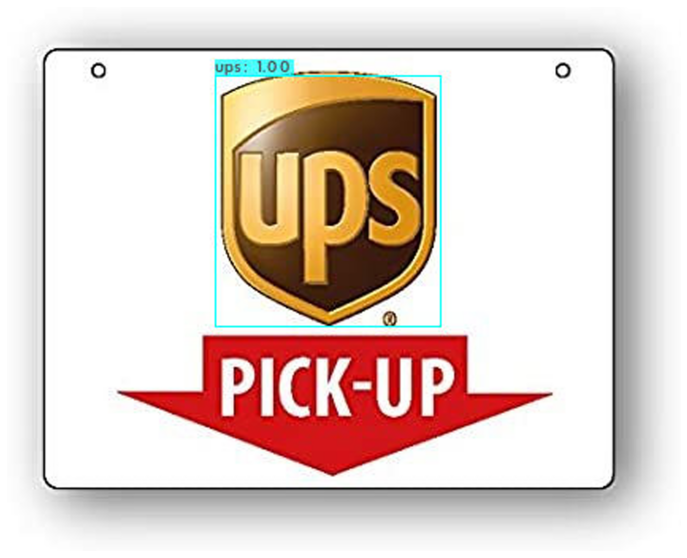

In [27]:
imShow('predictions.jpg')

In [28]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/darknet/data/obj/0090f02cab.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

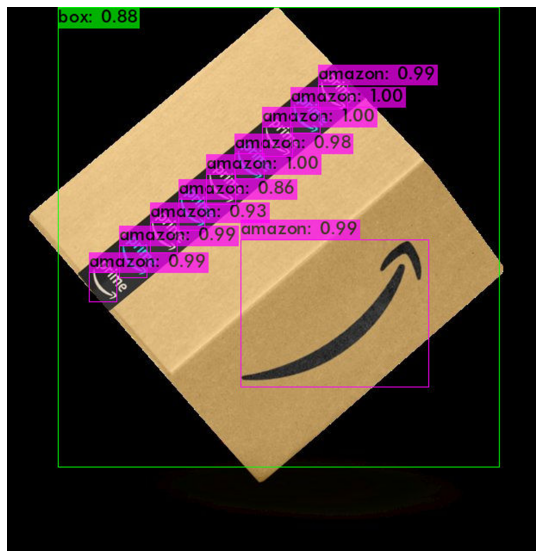

In [31]:
imShow('predictions.jpg')

In [32]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/gdrive/MyDrive/yolov4/PXL_20210429_182017798.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

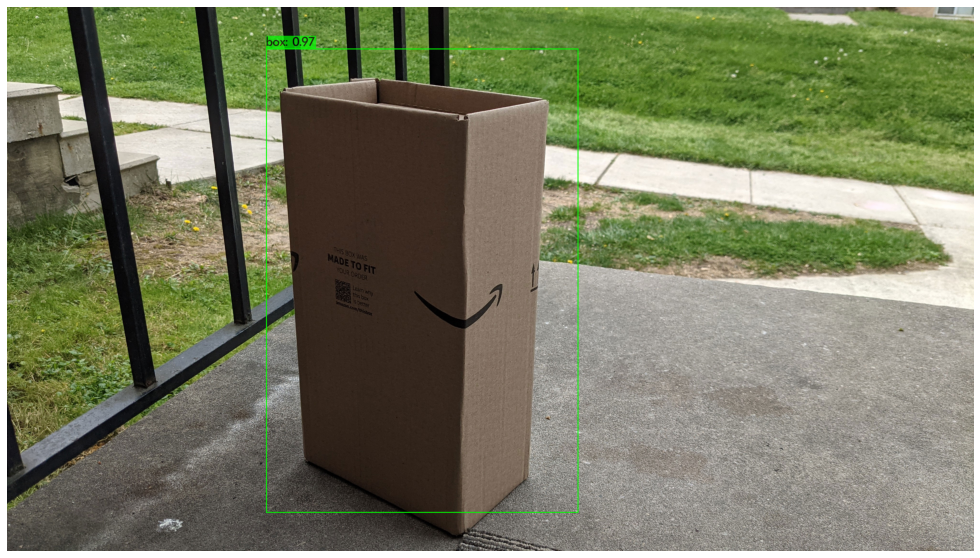

In [34]:
imShow('predictions.jpg')

In [36]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/gdrive/MyDrive/yolov4/PXL_20210429_182050525.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

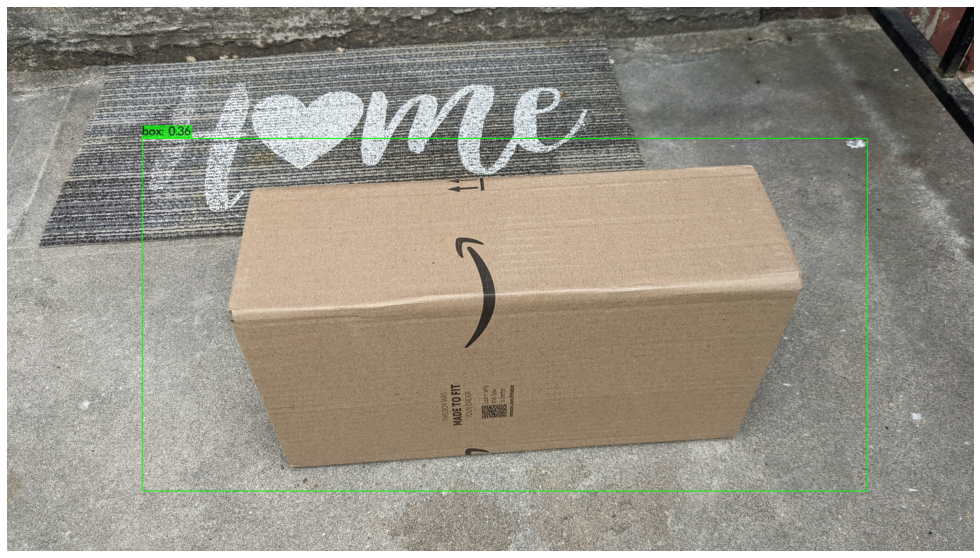

In [37]:
imShow('predictions.jpg')